<a href="https://colab.research.google.com/github/jameswu811102/Deep_Learning_Notes/blob/main/001_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_MLP_MNIST%E8%B3%87%E6%96%99%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 啟用GPU後，查看主機情況

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# 以MNIST資料集為示範，先載入資料
https://keras.io/zh/datasets/

In [ ]:
from tensorflow.keras.datasets import mnist

mnist.load_data()  # 印出來看看資料集長相  =>  (x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# 資料集已經幫我們切好了訓練資料跟測試資料  =>  不用再train_test_split了
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 再來建議一定要做，看一下你的訓練資料和測試資料有幾筆
* (訓練or測試)資料.shape

In [ ]:
print(x_train.shape)   # (60000, 28, 28)  =>  60000筆訓練資料，每一筆資料都是 28 * 28的圖像
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 試著將資料集裡面的資料畫出來看看 (灰階)
* pandas套件
* matplotlib.pyplot套件

In [ ]:
"""
了解顏色系統 RGB CYMK HSV

查資料稍稍看過 了解顏色的格式定義並非只有一種 0~255會依據不同的顏色格式有不同的代表意義色
"""
import pandas as pd

# 查看訓練資料的第一筆資料的數字化樣子
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


答案 5



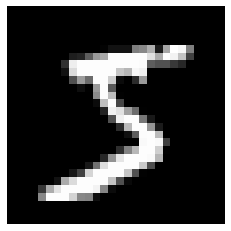

In [ ]:
# 透過圖像的方式來查看訓練答案的第一筆資料
import matplotlib.pyplot as plt

# 將x、y座標隱藏
plt.axis("off")

# 以灰階印出 (印出答案、然後看看題目的圖片樣子)
print("答案", y_train[0], end="\n\n")
plt.imshow(x_train[0], cmap="gray")  # 若cmap參數值最後加上 顏色_r 則顏色就會倒過來

# 準備建模型 tensorflow.keras.models
https://keras.io/zh/layers/core/

https://wizardforcel.gitbooks.io/mastering-tf-1x-zh/content/60.html

1. Sequential
2. model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 先把你要的模型層數設定好成一個List  =>  此例中只有兩層Fully-Connected Neural Networks (FCNNs)
# Dense(units設置, activation設置, input_dim=第一層需要設定輸入的dimension (圖片的 寬 * 長 * channel))
layers = [
          # 第一層FCNN
          Dense(units=512, activation="relu", input_dim=784),
          # 第二層FCNN (最後一層)  =>  神經元數 = 輸出的分類數量
          Dense(units=10, activation="softmax")
]

# 再將設定好的層數帶回模型中，已建立模型
model = Sequential(layers)

# 最後看一下模型的樣子
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
param
可調整係數 (可調整的權重參數)
"""

# 100480 = input * units + bias(統一激活函式需扣掉的誤差，有幾個激活函式就有幾個bias)  一個units就要配一個激活函式
#     = 784 * 128 + 128

# 1290 = 128 * 10 + 10

'\nparam\n可調整係數 (可調整的權重參數)\n'

# 模型的編譯 https://wizardforcel.gitbooks.io/mastering-tf-1x-zh/content/76.html
## 模型在建立並添加層(layer)後，必須要編譯compile後才能進行訓練 & 預測

* 編譯時要確定損失函式 (這樣才能回頭修正權重 => 反向傳播)

In [ ]:
"""
損失函數loss的選擇：mse坡度在你預測很差的時候太小，cross entropy坡度好多了

另外Cross Entropy又會依據你的輸出種類分為：
二元(sigmoid)  →  請使用 Binary Cross Entropy
多元(softmax)  →  請使用 Categorical Cross Entropy
"""

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# 訓練之前的資料預處理

In [ ]:
"""
答案要轉成One-Hot Encoding (多種類輸出結果，每種結果的可能加起來為1)

keras本身就有這功能  →  from tensorflow.keras.utils import to_categorical
"""
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("未轉化長成", y_train[0])
print("轉化後長成", y_train_cat[0])

未轉化長成 5
轉化後長成 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
"""
圖片處理  →  攤平，然後Scaling(不同的套件中，對權重係數有不同的設計，在tensorflow中，資料輸入範圍必須在0~1 or -1~1之間才可以與權重係數搭配)

圖片: [ [255, 0, 255, 128] ]
28 * 28  =>  784

使用 用作輸入的圖片矩陣.reshape / 進行Scaling的數字
"""
x_train_normal = x_train.reshape(60000, 784) / 255.0
x_test_normal = x_test.reshape(10000, 784) / 255.0

print("未處理長成\n", x_train[0])
print("\n\n")
print("處理後長成\n", x_train_normal[0])

未處理長成
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253

# 訓練模型
* 模型.fit

In [ ]:
"""
將預處理過後的資料丟到模型中訓練

模型.fit()

參數部分包含：

validation_split
→  切出一些驗證資料來做驗證，通常是10%的比例  →  此處原60000筆，切出6000筆，訓練資料有54000筆

epochs 
→  要做幾輪考古題  (在此實際考古題目數為54000，假設做10輪，則就是寫了540000道題目)
→  另外須注意，若是第二次fit， epochs次數是會累計上去的 (如第一次訓練了10次，第二次訓練5次，則實際訓練了15次)

batch_size
→  做幾道題就做一次訂正(梯度調整)， 即隨機批次梯度下降 (通常會約100~200就訂正一次，但會依照圖片大小作調整，圖片大則縮小做題數，反之亦然)
→  做了幾次梯度下降？ (此例中， 實際考古題目數 / 幾題訂正一次 * 共要做幾輪考古題)  答案為：54000/200 * 10 = 2700次梯度調整

verbose
→  是否印出詳細訓練資訊， 0(都不要有) ； 1(最詳細) ； 2(不要有進度條)


************
** 另外 **
************
什麼時候要停止  =>  keras callback  =>  其中的 EarlyStopping 
停止後儲存模型  =>  keras callback  =>  其中的 ModelCheckpoint

EarlyStopping(patience係指當後續val_loss沒有比前面好時，最多的容忍次數，超過就會提早停止訓練， restore_best_weights=使否回復到最好的val_loss狀態)
ModelCheckpoint("模型要儲存的名稱", save_best_only=是否只儲存訓練最好的權重係數模型)

詳細請參閱: https://keras.io/zh/callbacks/
"""

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("MNIST_MLP.h5", save_best_only=True)
]

model.fit(
    x = x_train_normal,
    y = y_train_cat,
    batch_size = 200,
    epochs = 25,
    verbose = 2,
    callbacks = callbacks,
    validation_split = 0.1,
)

Epoch 1/25
270/270 - 3s - loss: 0.3207 - accuracy: 0.9094 - val_loss: 0.1397 - val_accuracy: 0.9622
Epoch 2/25
270/270 - 3s - loss: 0.1355 - accuracy: 0.9602 - val_loss: 0.1007 - val_accuracy: 0.9720
Epoch 3/25
270/270 - 3s - loss: 0.0909 - accuracy: 0.9736 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 4/25
270/270 - 2s - loss: 0.0643 - accuracy: 0.9816 - val_loss: 0.0768 - val_accuracy: 0.9765
Epoch 5/25
270/270 - 2s - loss: 0.0485 - accuracy: 0.9859 - val_loss: 0.0705 - val_accuracy: 0.9788
Epoch 6/25
270/270 - 2s - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0725 - val_accuracy: 0.9792
Epoch 7/25
270/270 - 2s - loss: 0.0290 - accuracy: 0.9927 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 8/25
270/270 - 2s - loss: 0.0236 - accuracy: 0.9939 - val_loss: 0.0642 - val_accuracy: 0.9815
Epoch 9/25
270/270 - 2s - loss: 0.0168 - accuracy: 0.9967 - val_loss: 0.0667 - val_accuracy: 0.9808
Epoch 10/25
270/270 - 2s - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0677 - val_accuracy: 0.9813

In [ ]:
# loss 就是交叉商
# 該看 val_loss & val_accuracy 這組， 其中又以val_loss更重要 (預測與答案之間的差距比值 => 越小越好)

In [ ]:
"""
最後做一個完整的測試

→  模型.evaluate(處理過測試資料, 處理過測試答案)


可根據測試結果可以再回去重新調整當初Fully-Connected的units數量，做模型調整  (此例中是將之前第一個Dense層的units數目改成512)
"""

model.evaluate(x_test_normal, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9824


[0.06182580068707466, 0.9824000000953674]

# 印出混淆矩陣來看一下結果

In [ ]:
"""
以前的 predict  →  predict_classes
以前的 predict_proba  →  predict
只要使用 tensorflow 做混淆矩陣  →  就要放 One-Hot Encoding過後的值 (在此則是使用sklearn，所以不用放One-Hot Encoding的值)

"""

from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_normal)

#　因是用sklearn來做混淆矩陣  →  測試答案不用放One-Hot Encoding版本的
matrix = confusion_matrix(y_test, pre)

pd.DataFrame(
    matrix,
    columns = ["預測是{}".format(i) for i in range(10)],
    index = ["實際是{}".format(i) for i in range(10)]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,預測是0,預測是1,預測是2,預測是3,預測是4,預測是5,預測是6,預測是7,預測是8,預測是9
實際是0,973,1,1,0,1,0,1,1,2,0
實際是1,0,1127,3,0,0,0,2,1,2,0
實際是2,4,1,1011,1,1,0,2,5,6,1
實際是3,1,0,4,990,0,3,0,3,6,3
實際是4,2,0,2,1,964,0,2,3,2,6
實際是5,2,0,0,5,1,874,3,1,4,2
實際是6,5,2,1,1,3,6,940,0,0,0
實際是7,0,3,7,1,0,0,0,1011,3,3
實際是8,5,0,3,4,2,2,1,4,951,2
實際是9,3,2,0,5,5,2,0,6,3,983


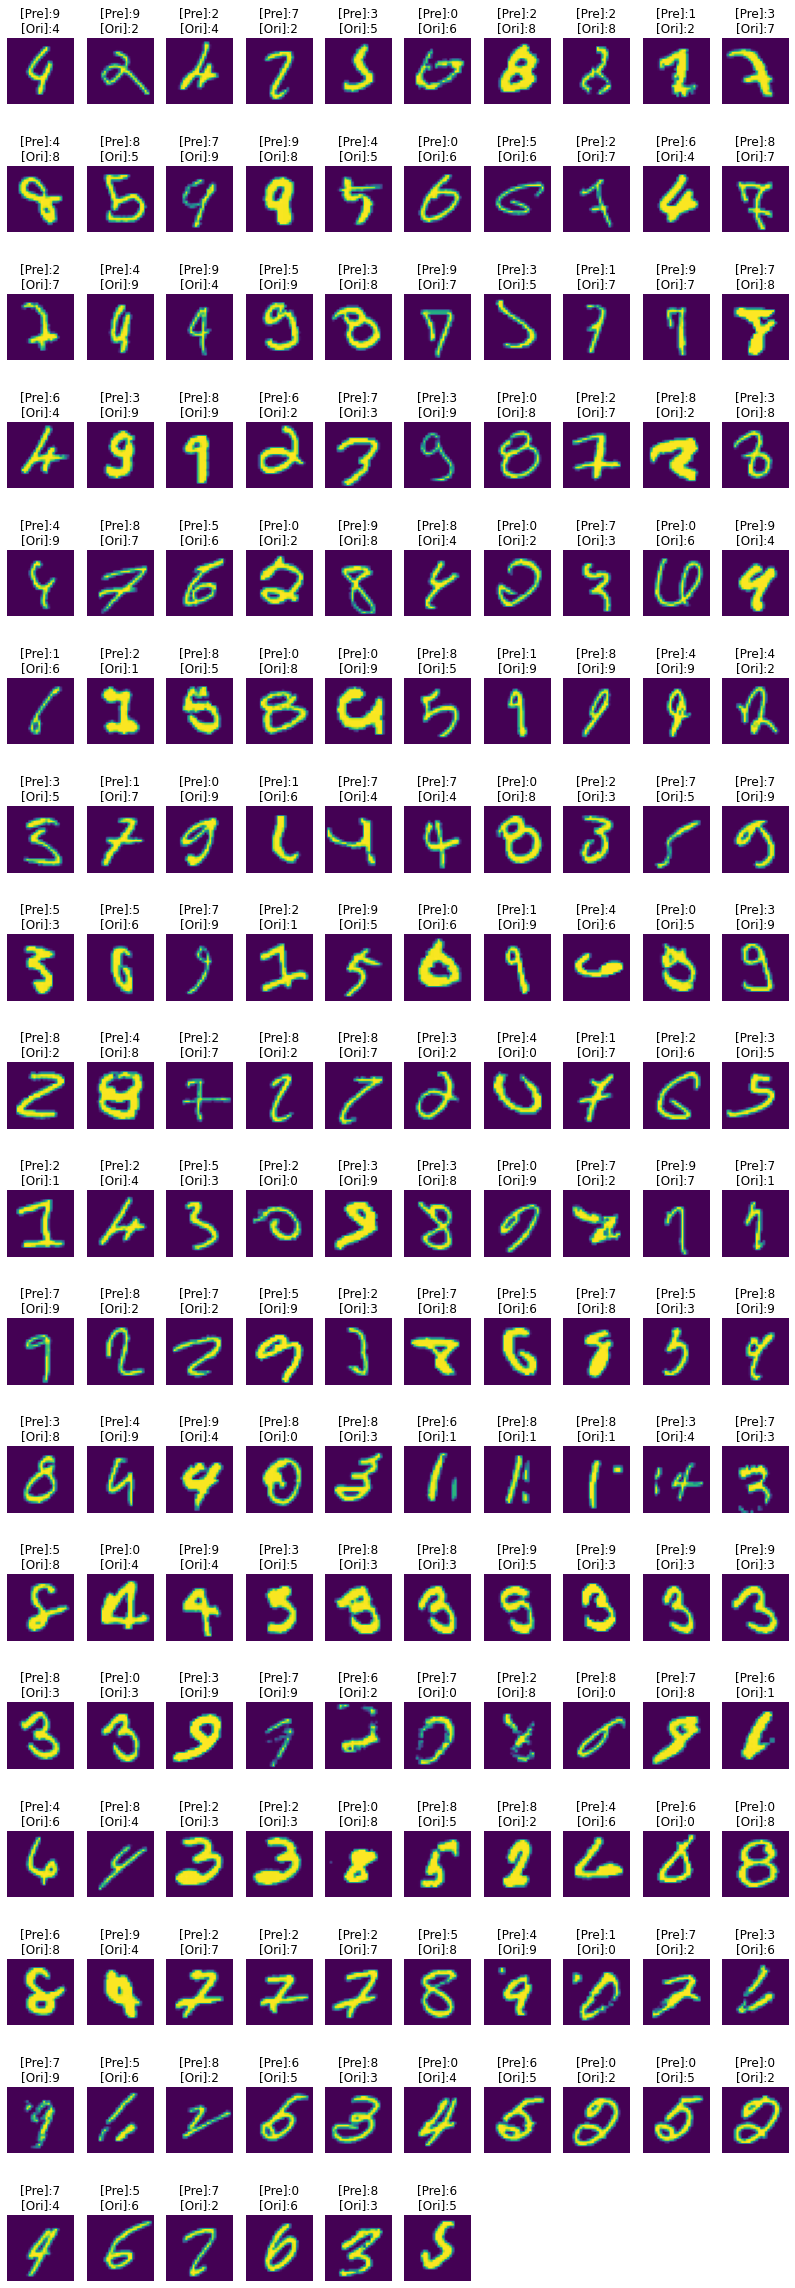

In [ ]:
# plt.subplot(總高，總寬，第幾張)
import numpy as np

pre != y_test # False就是相等
# np.nonzero([])  # 給出非0位置的座標(位於第幾個list, 非0值的index)

# 預測與實際答案不相符的index 
pre_idx = np.nonzero(pre != y_test)[0]

# 預測的答案 (預測錯誤的值)
pre_false = pre[pre_idx]

# 查看實際答案 (預測錯誤的正確值)
ans_label = y_test[pre_idx]

# 查看測試資料的圖片 (猜錯的圖片)
pre_image = x_test[pre_idx]


# 畫圖看看
plt.figure(figsize=(14, 42))

width = 10
height = len(pre_idx) // width + 1

for i in range(len(pre_image)):
  plt.subplot(height, width, i+1)
  title = "[Pre]:{}\n[Ori]:{}".format(pre_false[i], ans_label[i])
  plt.title(title)
  plt.axis("off")
  plt.imshow(pre_image[i])


# 若是模型之前就已經有訓練過，並存有`*.h5`的檔案，可直接讀取

In [ ]:
import os
from tensorflow.keras.models import load_model

if not os.path.exists("MNIST_MLP.h5"):
  layers = [
          Dense(units=512, activation="relu", input_dim=784),
          Dense(units=10, activation="softmax")
  ]


  model = Sequential(layers)
  model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
  )

else:
  # 手動儲存模型 => model.save("模型名稱")
  # 讀取完不用再compile，可以直接進行預測(evaluate, predict)，或是繼續訓練(fit)
  
  print("Loading Model...", "\n")
  model = load_model("MNIST_MLP.h5")
  model.summary()

Loading Model... 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
